In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import datasets

In [7]:
happiness_data_2021_path = "Resources/world-happiness-report-2021.csv"
happiness_data_2021 = pd.read_csv(happiness_data_2021_path)

In [8]:
happiness_df = pd.DataFrame(happiness_data_2021)
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [9]:
data_mean = happiness_data_2021.groupby(['Regional indicator'])[['Ladder score']].mean()

data_mean.sort_values(by = 'Ladder score', ascending = False)

,Ladder score
Regional indicator,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


In [11]:
list_Ten_LeastHappy = happiness_data_2021.sort_values(by = 'Ladder score')

list_Ten_LeastHappy.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
141,Tanzania,Sub-Saharan Africa,3.623,0.071,3.762,3.485,7.876,0.702,57.999,0.833,0.183,0.577,2.43,0.433,0.540,0.300,0.549,0.307,0.231,1.263
140,Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
139,Burundi,Sub-Saharan Africa,3.775,0.107,3.985,3.565,6.635,0.490,53.400,0.626,-0.024,0.607,2.43,0.000,0.062,0.155,0.298,0.172,0.212,2.876


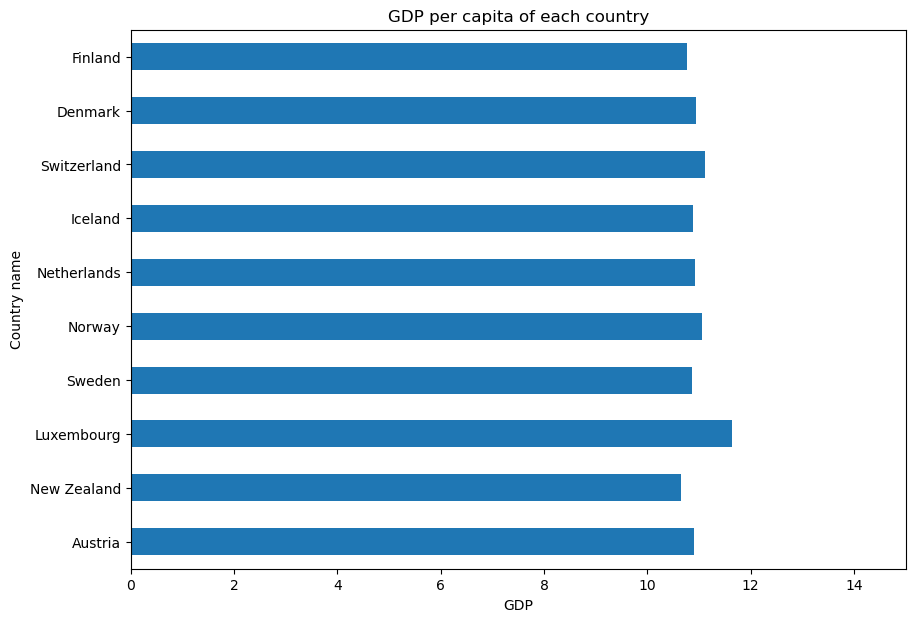

In [15]:
data_plot = happiness_data_2021.set_index('Country name')
data_plot = data_plot[0:10]['Logged GDP per capita']

fig, ax = plt.subplots(figsize = (10,7))                               
bar_plot = data_plot.plot.barh()                                       
bar_plot.set_title('GDP per capita of each country')
bar_plot.set_xlabel('GDP')
bar_plot.invert_yaxis()                                                
plt.xlim(0,15)                                                          

plt.show()